In [1]:
import numpy as np
import math
import os
import random
import rasterio
import matplotlib.pyplot as plt

In [2]:
#

In [3]:
R = 50

arr_sph = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr_sph.shape[0]
ncols = arr_sph.shape[1]
#arr1

In [4]:
ncols

101

In [5]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr_sph[x][y] = z
        except ValueError:
            pass

arr_sph
#print(np.array_str(arr1, precision=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(np.max(arr_sph), np.min(arr_sph))

50.0 0.0


In [7]:
# Noising
dict_ns = {}
arr_n = np.random.randn(nrows, ncols)
arr_sph_n = arr_sph + arr_n
arr_sph_n_2 = arr_sph + arr_n * 2
arr_sph_n_05 = arr_sph + arr_n * 0.5
dict_ns['sph_n_1'], dict_ns['sph_n_05'], dict_ns['sph_n_2'] = arr_sph_n, arr_sph_n_05, arr_sph_n_2
dict_ns
#arr_sph_n_10 = arr_sph + arr_n * 10

{'sph_n_1': array([[ 0.47372233,  0.31164282, -0.79280853, ..., -1.21901709,
          0.43808534, -0.67366247],
        [ 0.60216565,  0.82260701,  0.48183459, ...,  0.18168958,
         -0.40120632,  0.67765975],
        [ 1.00988724, -1.44409414,  1.05541533, ..., -0.8089553 ,
          0.32255055,  0.44785531],
        ...,
        [-0.91088733,  0.70131419,  0.95689431, ..., -0.47247585,
          0.14935949, -0.09560546],
        [-1.31189721,  1.01368623, -0.04059616, ..., -0.66689818,
         -0.4677437 ,  1.43230339],
        [ 0.27469047,  2.006736  , -1.43677896, ..., -0.45977163,
          1.04398403, -0.72248963]]),
 'sph_n_05': array([[ 0.23686116,  0.15582141, -0.39640427, ..., -0.60950854,
          0.21904267, -0.33683124],
        [ 0.30108283,  0.41130351,  0.2409173 , ...,  0.09084479,
         -0.20060316,  0.33882987],
        [ 0.50494362, -0.72204707,  0.52770766, ..., -0.40447765,
          0.16127527,  0.22392765],
        ...,
        [-0.45544367,  0.350657

In [110]:
print(np.max(arr_sph), np.min(arr_sph))
print(np.max(arr_n), np.min(arr_n))
print(np.max(arr_sph_n_05), np.min(arr_sph_n_05))
print(np.max(arr_sph_n), np.min(arr_sph_n))
print(np.max(arr_sph_n_2), np.min(arr_sph_n_2))
print(np.max(arr_sph_n_10), np.min(arr_sph_n_10))

50.0 0.0
3.574298531556393 -3.625527002913782
51.19221186053342 -1.6195626655281548
52.56474889274224 -3.2391253310563095
55.30982295715988 -6.478250662112619
78.6236007423819 -35.0249691976793


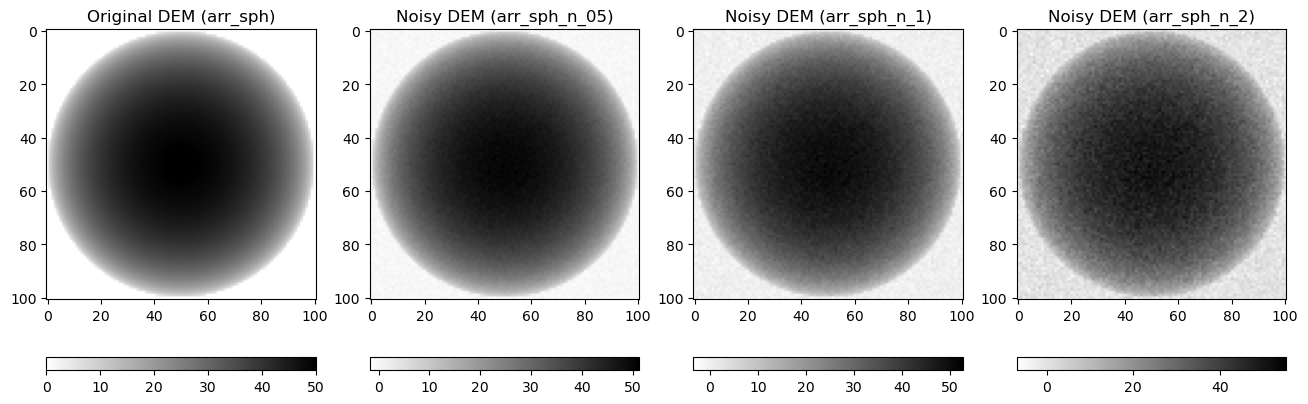

In [53]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Original DEM (arr_sph)')
plt.imshow(arr_sph, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Noisy DEM (arr_sph_n_05)')
plt.imshow(arr_sph_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Noisy DEM (arr_sph_n_1)')
plt.imshow(arr_sph_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Noisy DEM (arr_sph_n_2)')
plt.imshow(arr_sph_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.show()

In [11]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_sph

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    

for _ in dict_ns:
    data = dict_ns[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemisphere" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [12]:
#hemicylinder
R = 30

arr_cyl = np.zeros((int(3*R), int(2*R)+1), dtype = 'float')
nrows = arr_cyl.shape[0]
ncols = arr_cyl.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_cyl[x][y] = z
        except ValueError:
            pass

#arr_c

In [13]:
np.max(arr_cyl)

30.0

In [14]:
#noising
#numpy.random.randn
dict_nc = {}
arr_n = np.random.randn(nrows, ncols)
arr_cyl_n = arr_cyl + arr_n
arr_cyl_n_2 = arr_cyl + arr_n * 2
arr_cyl_n_05 = arr_cyl + arr_n * 0.5
dict_nc['cyl_n_1'], dict_nc['cyl_n_05'], dict_nc['cyl_n_2'] = arr_cyl_n, arr_cyl_n_05, arr_cyl_n_2
dict_nc
#arr_cn

{'cyl_n_1': array([[-0.04181618,  7.59012565, 10.96982913, ..., 10.2822563 ,
          7.18748677,  1.021595  ],
        [-0.6391033 ,  8.85071447, 11.38496721, ..., 11.54217571,
          6.76212613,  0.54080543],
        [ 1.43326285,  7.08975696, 12.55844096, ..., 11.84719494,
          9.8219432 , -0.07710386],
        ...,
        [-0.98550692,  8.49056396,  8.96073137, ..., 10.79752703,
          7.21442108, -0.57979233],
        [-1.69567166,  6.36781652,  9.60714326, ..., 10.0545791 ,
          7.26025552, -0.70391179],
        [ 1.44229388,  8.39320489, 11.98655055, ..., 11.0307604 ,
          6.24110586, -0.13015286]]),
 'cyl_n_05': array([[-0.02090809,  7.6356357 , 10.87007937, ..., 10.52629296,
          7.43431626,  0.5107975 ],
        [-0.31955165,  8.26593011, 11.07764841, ..., 11.15625266,
          7.22163594,  0.27040272],
        [ 0.71663142,  7.38545135, 11.66438529, ..., 11.30876228,
          8.75154448, -0.03855193],
        ...,
        [-0.49275346,  8.085854

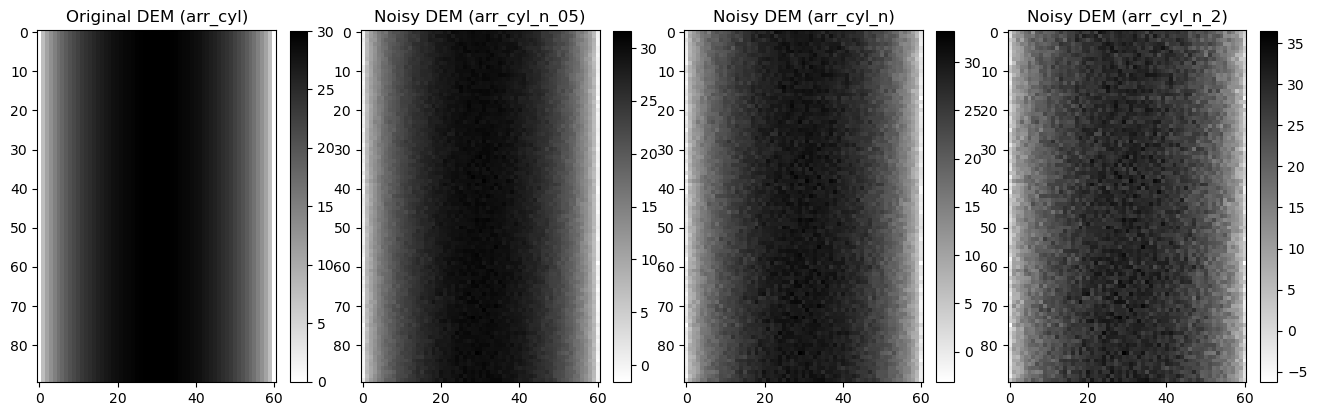

In [15]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Original DEM (arr_cyl)')
plt.imshow(arr_cyl, cmap='binary')
plt.colorbar(fraction=0.065)

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Noisy DEM (arr_cyl_n_05)')
plt.imshow(arr_cyl_n_05, cmap='binary')
plt.colorbar(fraction=0.065)

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Noisy DEM (arr_cyl_n)')
plt.imshow(arr_cyl_n, cmap='binary')
plt.colorbar(fraction=0.065)

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Noisy DEM (arr_cyl_n_2)')
plt.imshow(arr_cyl_n_2, cmap='binary')
plt.colorbar(fraction=0.065)

plt.show()

In [16]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_cyl

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_nc:
    data = dict_nc[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [17]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 50
b1 = 50

arr_par = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_par.shape[0]
ncols = arr_par.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_par[x][y] = z
        except ValueError:
            pass

#arr_hp

In [25]:
#noising
#numpy.random.randn
dict_np = {}
arr_n = np.random.randn(nrows, ncols)
arr_par_n = arr_par + arr_n
arr_par_n_2 = arr_par + arr_n * 2
arr_par_n_05 = arr_par + arr_n * 0.5
dict_np['par_n_1'], dict_np['par_n_05'], dict_np['par_n_2'] = arr_par_n, arr_par_n_05, arr_par_n_2
dict_np
#arr_cn

{'par_n_1': array([[-0.71546387, -1.87750011,  0.59140986, ..., -4.81488102,
         -1.79996817, -7.09558003],
        [-0.52060218,  0.18293755, -1.5773488 , ..., -3.78259608,
         -5.09009693, -3.79980806],
        [-0.50687432,  0.55924797, -0.23618481, ..., -1.81682274,
         -3.62464803, -3.88578396],
        ...,
        [ 3.52150692,  3.4140892 ,  3.17259876, ...,  0.86947778,
         -1.03992653, -2.66423045],
        [ 3.59987098,  4.18862576,  3.99765275, ..., -1.236013  ,
          0.07931441, -0.16289811],
        [ 4.58125807,  5.11945808,  2.95565774, ..., -1.20244291,
          1.36379993, -0.25547087]]),
 'par_n_05': array([[-0.35773193, -0.93895005,  0.29490493, ..., -4.32824051,
         -2.86018409, -5.54779002],
        [-0.26010109,  0.09146877, -0.7892744 , ..., -3.81189804,
         -4.50504846, -3.89970403],
        [-0.25263716,  0.28022398, -0.11809241, ..., -2.82841137,
         -3.77172402, -3.94209198],
        ...,
        [ 3.68155346,  3.627644

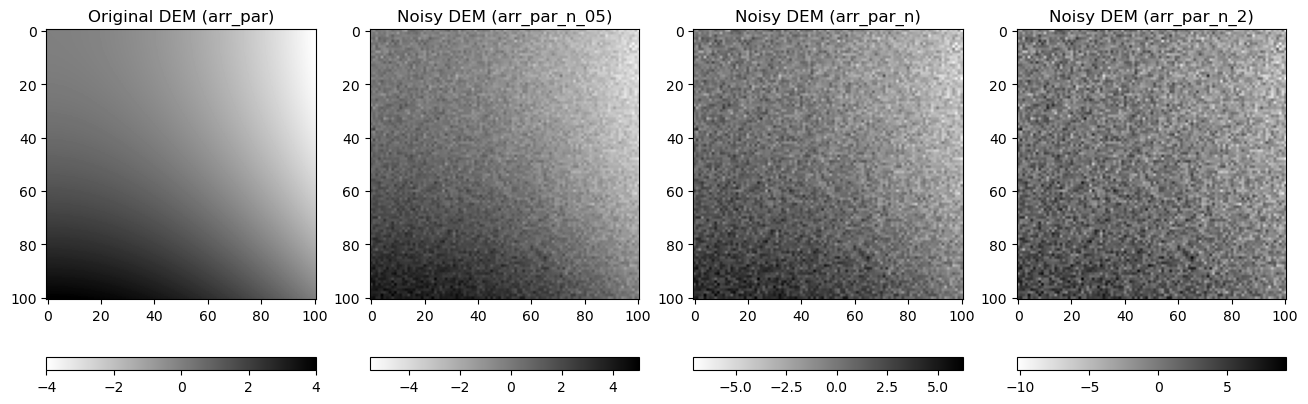

In [52]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_par, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Noisy DEM (arr_par_n_05)')
plt.imshow(arr_par_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_par_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_par_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.show()

In [27]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_par

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_np:
    data = dict_np[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\paraboloid" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [47]:
#inclined surface
# ax + by + cz + d = 0
# z = - (d+ax+by) / c

d = 10
a = 25
b = 25
c = 10

arr_inc = np.zeros((int(2*a)+1, int(2*b)+1), dtype = 'float')
nrows = arr_inc.shape[0]
ncols = arr_inc.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (d + a * x + b * y) / c
            arr_inc[x][y] = z
        except ValueError:
            pass

#arr_inc

In [48]:
#noising
#numpy.random.randn
dict_ni = {}
arr_n = np.random.randn(nrows, ncols)
arr_inc_n = arr_inc + arr_n
arr_inc_n_2 = arr_inc + arr_n * 2
arr_inc_n_05 = arr_inc + arr_n * 0.5
dict_ni['inc_n_1'], dict_ni['inc_n_05'], dict_ni['inc_n_2'] = arr_inc_n, arr_inc_n_05, arr_inc_n_2
dict_ni
#arr_cn

{'inc_n_1': array([[  1.45343875,   3.33381083,   7.64232539, ..., 121.42177091,
         121.849138  , 126.04059387],
        [  2.7934169 ,   3.58327882,   8.63180076, ..., 123.82391353,
         125.92553877, 126.89408734],
        [  8.5596474 ,   7.20670583,  11.23302717, ..., 128.53004658,
         127.14765922, 131.4500241 ],
        ...,
        [121.22953002, 122.77507662, 126.01266039, ..., 238.88119991,
         244.12492508, 246.84549719],
        [124.20999542, 126.82489752, 127.44856838, ..., 241.09995368,
         247.21762866, 249.28408617],
        [126.07869063, 127.98549366, 132.95289703, ..., 246.04132236,
         248.30802532, 250.10180687]]),
 'inc_n_05': array([[  1.22671937,   3.41690541,   6.82116269, ..., 121.21088546,
         122.674569  , 126.02029694],
        [  3.14670845,   4.79163941,   8.56590038, ..., 123.66195676,
         125.96276938, 127.69704367],
        [  7.2798237 ,   7.85335291,  11.11651359, ..., 127.26502329,
         127.82382961, 131.2

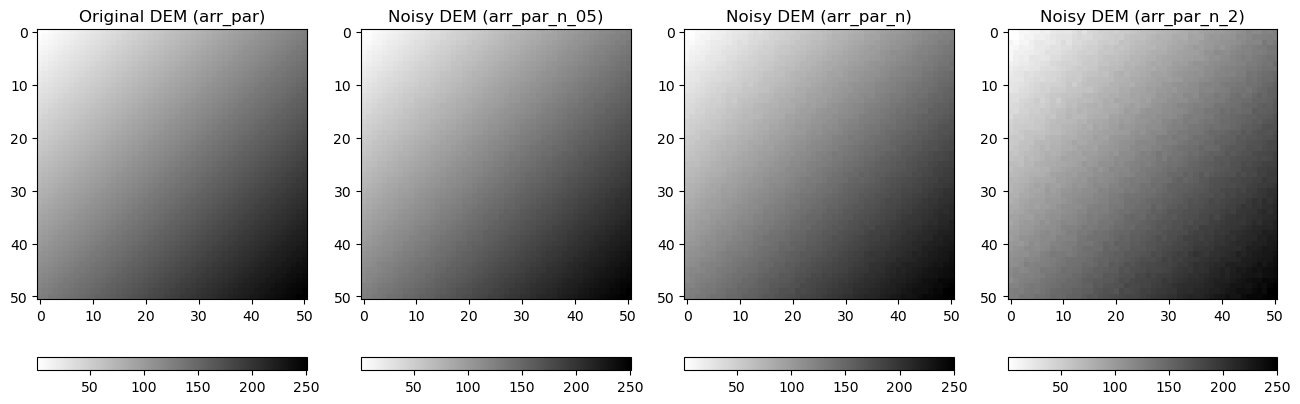

In [51]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_inc, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Noisy DEM (arr_par_n_05)')
plt.imshow(arr_inc_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_inc_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_inc_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.show()

In [55]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_inc

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\inclined_surface_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_ni:
    data = dict_ni[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\inclined_surface" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

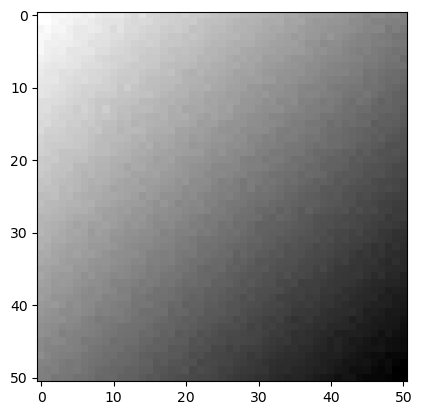

In [56]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\inclined_surface_n_2.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='binary')
plt.show()

In [57]:
#├───clear
#│       hemicylinder_clear.tif
#│       hemisphere_clear.tif
#│       inclined_surface_clear.tif
#│       paraboloid_clear.tif
#│
#└───noisy
#        hemicylinder_n_05.tif
#        hemicylinder_n_1.tif
#        hemicylinder_n_2.tif
#        hemisphere_n_05.tif
#        hemisphere_n_1.tif
#        hemisphere_n_2.tif
#        inclined_surface_n_05.tif
#        inclined_surface_n_1.tif
#        inclined_surface_n_2.tif
#        paraboloid_n_05.tif
#        paraboloid_n_1.tif
#        paraboloid_n_2.tif